<a href="https://colab.research.google.com/github/DanielKorenDataScience/RegressionProject/blob/main/Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Prices prediction using Regression ML model**

# **Source link**

https://www.kaggle.com/muhammetvarl/laptop-price

# **Preliminary**

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import sys
import os
import re

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model

# For the tree visualization
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [398]:
data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/RegressionProject/master/laptop_price.csv'
resp = requests.get(data_url)
text = resp.text

with open('laptop_price.csv', 'w') as fh:
    fh.write(text)
  
df = pd.read_csv('laptop_price.csv')
df_origin = pd.read_csv('laptop_price.csv')

In [399]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859–1')

# **Knowing the data**

In [400]:
df.head(5)

laptop_ID Company      Product  ...  OpSys  Weight Price_euros
0          1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1          2   Apple  Macbook Air  ...  macOS  1.34kg      898.94
2          3      HP       250 G6  ...  No OS  1.86kg      575.00
3          4   Apple  MacBook Pro  ...  macOS  1.83kg     2537.45
4          5   Apple  MacBook Pro  ...  macOS  1.37kg     1803.60

[5 rows x 13 columns]

In [401]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [402]:
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [403]:
df.T

0     ...                                  1302
laptop_ID                                          1  ...                                  1320
Company                                        Apple  ...                                  Asus
Product                                  MacBook Pro  ...   X553SA-XX031T (N3050/4GB/500GB/W10)
TypeName                                   Ultrabook  ...                              Notebook
Inches                                          13.3  ...                                  15.6
ScreenResolution  IPS Panel Retina Display 2560x1600  ...                              1366x768
Cpu                             Intel Core i5 2.3GHz  ...  Intel Celeron Dual Core N3050 1.6GHz
Ram                                              8GB  ...                                   4GB
Memory                                     128GB SSD  ...                             500GB HDD
Gpu                     Intel Iris Plus Graphics 640  ...                     Intel HD Graphics
OpSys                                          macOS  ...                            Windows 10
Weight                                        1.37kg  ...                                 2.2kg
Price_euros                                  1339.69  ...                                   369

[13 rows x 1303 columns]

In [404]:
df.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [405]:
col = list(df.columns)
for column in col: #.split():
    print(column, ':')
#    df[column] = df[column].str.strip()
    print(df[column].value_counts())
    print()

    """ Product, Screen Resolution, CPU, Weight """

laptop_ID :
1320    1
453     1
435     1
436     1
437     1
       ..
880     1
881     1
882     1
883     1
1       1
Name: laptop_ID, Length: 1303, dtype: int64

Company :
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Fujitsu        3
Chuwi          3
LG             3
Google         3
Huawei         2
Name: Company, dtype: int64

Product :
XPS 13                   30
Inspiron 3567            29
250 G6                   21
Legion Y520-15IKBN       19
Vostro 3568              19
                         ..
Chromebook C738T-C2EJ     1
Envy 13-AB077cl           1
Portege X30-D-10X         1
Aspire A515-51G-59QF      1
Spectre X360              1
Name: Product, Length: 618, dtype: int64

TypeName :
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    

# Conclusions:
1. laptop_ID - Unique, not relevant to the model
2. Company - need to split category to columns
3. Product - ???
4. TypeName - need to split category to columns
5. Inches - need to make rounded
6. ScreenResolution - ???
7. Cpu - I think we should smart seperate to manufacturer and have the model in some other way !?
8. Ram - numeric
9. Memory - storage
10. Gpu - category to column !?
11. OpSys - Important -- category to columns 
12. Weight
13. Price_euros - ***Predict***

# **EDA - Data Exploration**

In [406]:
df.head(3)

laptop_ID Company      Product  ...  OpSys  Weight Price_euros
0          1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1          2   Apple  Macbook Air  ...  macOS  1.34kg      898.94
2          3      HP       250 G6  ...  No OS  1.86kg      575.00

[3 rows x 13 columns]

In [407]:
sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


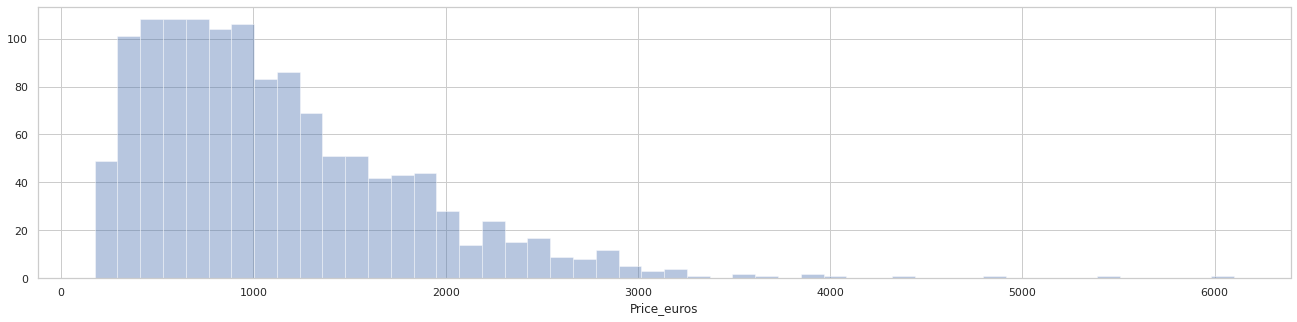

In [408]:
plt.figure(figsize=(20,5))
sns.distplot(df.Price_euros,bins=50, kde=False)

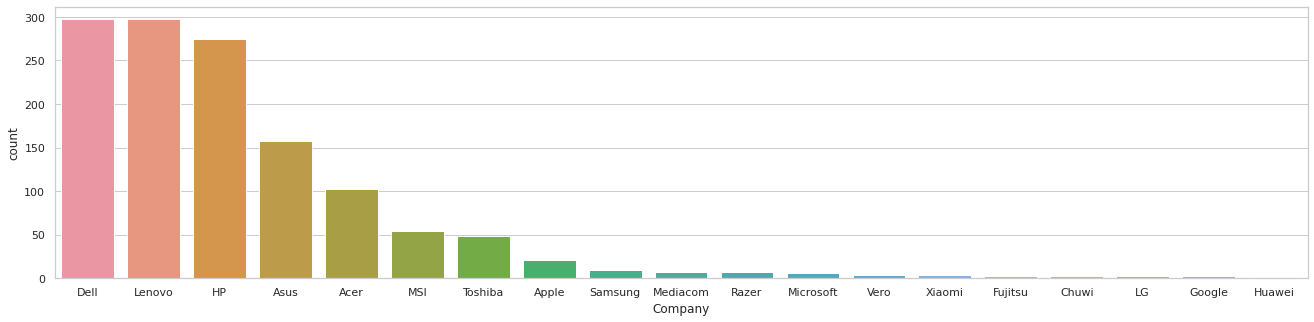

In [409]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x=df.Company, order = df['Company'].value_counts().index )

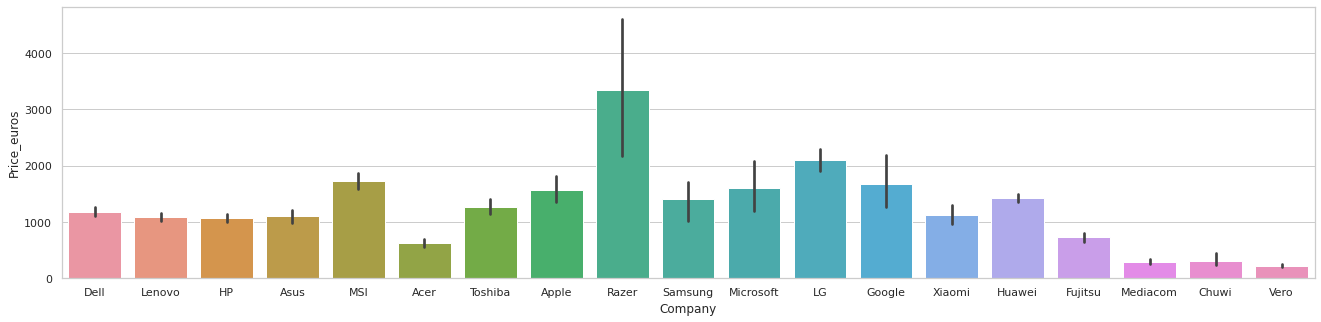

In [410]:
plt.figure(figsize=(20,5))
plot_order = df.groupby('Company')['Price_euros'].sum().sort_values(ascending=False).index.values
sns.barplot(data=df, x=df.Company, y=df.Price_euros, order=plot_order )

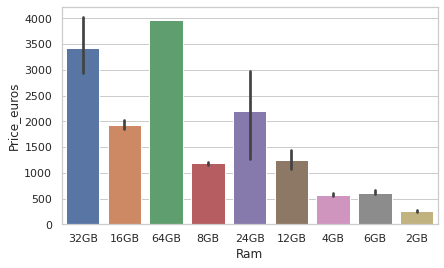

In [411]:
df.sort_values('Price_euros', inplace=True, ascending=False)
sns.barplot(data=df, x=df['Ram'], y=df['Price_euros'])

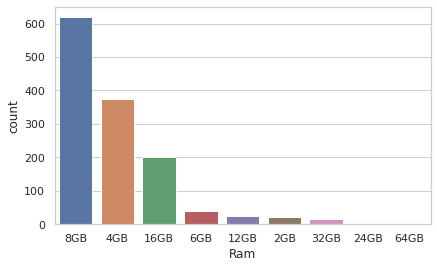

In [412]:
sns.countplot(data=df, x='Ram', order = df['Ram'].value_counts().index)

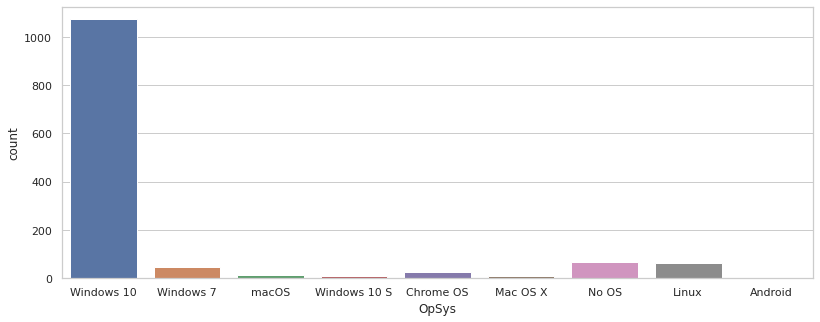

In [413]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='OpSys') #, y='Price_euros')

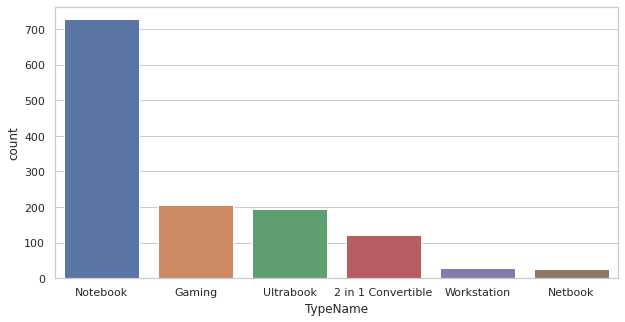

In [414]:
plt.figure(figsize=(9,5))
plot_order = df.groupby('TypeName')['Price_euros'].count().sort_values(ascending=False).index.values
sns.countplot(data=df, x='TypeName', order=plot_order)

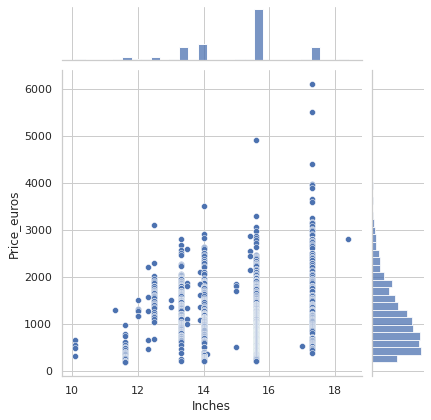

In [415]:
sns.jointplot(x='Inches',y='Price_euros', kind='scatter', data=df)

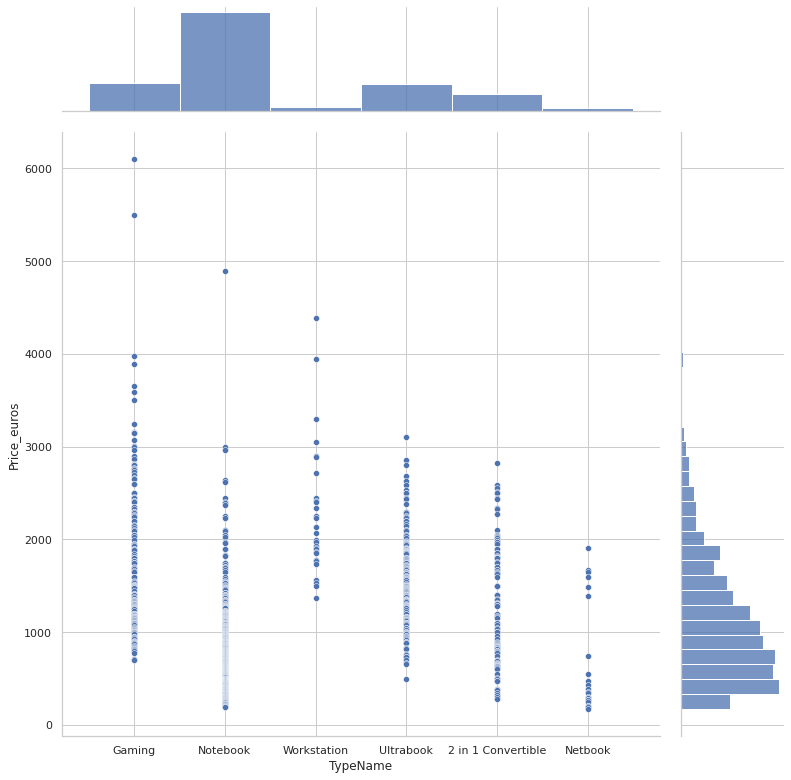

In [416]:
sns.jointplot(x='TypeName', y='Price_euros', kind='scatter', data=df, height=11)

# **Data Cleaning**

In [417]:
df.Price_euros.sort_values().tail(10)

1231    3499.0
780     3588.8
723     3659.4
238     3890.0
1136    3949.4
1066    3975.0
749     4389.0
610     4899.0
830     5499.0
196     6099.0
Name: Price_euros, dtype: float64

In [418]:
#removing noisy values - prices over 3000
df = df[df['Price_euros'] <= 3000]

# **Data Manipulation**

In [419]:
df.nunique()

laptop_ID           1284
Company               19
Product              612
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  116
Ram                    8
Memory                36
Gpu                  107
OpSys                  9
Weight               178
Price_euros          772
dtype: int64

In [420]:
df.head(2)

laptop_ID Company             Product  ...       OpSys  Weight Price_euros
563        570  Lenovo        Thinkpad P71  ...  Windows 10   3.4kg      2999.0
247        252    Asus  Rog G701VIK-BA060T  ...  Windows 10   3.6kg      2999.0

[2 rows x 13 columns]

In [421]:
df_Company = pd.get_dummies(df.Company, prefix='co_')
df_Product = pd.get_dummies(df.Product, prefix='prd_')
df_TypName = pd.get_dummies(df.TypeName, prefix='tpn_')
df_os = pd.get_dummies(df.OpSys, prefix='os_')

In [422]:
# Round inch information 
df.Inches = df.Inches.round()

# Ram to number
df.Ram = df.Ram.str.replace('GB','').astype(int)

# Weight to number
df.Weight = df.Weight.str.replace('kg','').astype(float)

# Memory to number
df['Memory_SSD']= np.where(df.Memory.str.find("SSD")==-1,0,1)
df['Memory_Flash_Storage']= np.where(df.Memory.str.find("Flash Storage")==-1,0,1)
df['Memory_HDD']= np.where(df.Memory.str.find("HDD")==-1,0,1)
df['Memory_Hybrid']= np.where(df.Memory.str.find("Hybrid")==-1,0,1)
df['Storage_amt'] = df.Memory.str.split().str[0]
storage_map = {'1.0TB':'1000', '1TB':'1000', '2TB':'2000', '508':'500'}
df.Storage_amt.replace(storage_map , inplace=True)
df.Storage_amt = df.Storage_amt.str.replace('GB','').astype(int)

# Split Cpu information 
df['Cpu_brand'] = df.Cpu.str.split().str[0]
df['Cpu_speed'] = df.Cpu.str.split().str[-1]
df.Cpu_speed = df.Cpu_speed.str.split('GHz').str[0].astype(float)
df_Cpu_brand = pd.get_dummies(df.Cpu_brand, prefix='Cpu_')
df['Cpu_HighSeries']=np.where((df.Cpu.str.split(" ",1).str[0]=="AMD") | (df.Cpu.str.split(" ",1).str[0]=="Samsung"),df.Cpu.str.split(" ",1).str[1].str.split(" ",1).str[0],
          np.where((df.Cpu.str.split(" ",1).str[0]=="Intel") & (df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0].isin(['Xeon','Atom'])),df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0],
          np.where(df.Cpu.str.split(" ",1).str[0]=="Intel",df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0]+df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[1],     
          "missing")))
df_Cpu_HighSeries = pd.get_dummies(df.Cpu_HighSeries, prefix='CpuH_')

test1=df.Cpu.str.split().str[-2].str.split("-").str[-1]
test2=test1.apply(lambda x:re.findall(r'\d+|$',x)[0])
test2.replace([""],["0"],inplace=True)
test2=test2.astype(int)
df['Cpu_LowSeries']=np.where(test2<10,0,test2)

# Split Gpu information
df['Gpu_brand'] = df.Gpu.str.split().str[0]
df_Gpu_brand = pd.get_dummies(df.Gpu_brand, prefix='Gpu_')
df['Gpu_SubType']=np.where(df.Gpu.str.split(" ",2).str[1].isin(['Graphics','R17M-M1-70','Mali','R4']),'missing',df.Gpu.str.split(" ",2).str[1])
df_Gpu_SubType = pd.get_dummies(df.Gpu_SubType, prefix='GpuST_')

# Handle ScreenResolution information
df['Scr_to'] = df.ScreenResolution.str.split('x').str[-1]
df['Scr_to'].astype(int)
df['Scr_from'] = df.ScreenResolution.str.split('x').str[0]
df['Scr_from'] = df.Scr_from.str.split().str[-1]
df['Scr_from'].astype(int)
df['Scr_Touchscreen']=np.where(df.ScreenResolution.str.find("Touchscreen")>-1,1,0)
df['Scr_HD']=np.where(df.ScreenResolution.str.find("Full HD")>-1,'Full_HD',
                    np.where(df.ScreenResolution.str.find("Quad HD")>-1,'Quad_HD',
                    np.where(df.ScreenResolution.str.find("Ultra HD")>-1,'Ultra_HD',
                             'missing')))
df_Scr_HD = pd.get_dummies(df.Scr_HD, prefix='ScrHD_')

In [423]:
# Combining the Data
df_model = pd.merge(df[['Inches', 'Ram', 'Weight', 'Price_euros', 'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries','Scr_Touchscreen']], df_Company, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_Product, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_TypName, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_os, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_Cpu_brand, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_Gpu_brand, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_Cpu_HighSeries, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_Gpu_SubType, left_index=True, right_index=True)
df_model = pd.merge(df_model, df_Scr_HD, left_index=True, right_index=True)
#df.drop(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], axis=1, inplace=True)

df_model.head(2)

Inches  Ram  Weight  ...  ScrHD__Quad_HD  ScrHD__Ultra_HD  ScrHD__missing
563    17.0    8     3.4  ...               0                0               0
247    17.0   16     3.6  ...               0                0               0

[2 rows x 700 columns]

In [424]:
df_model.shape

(1284, 700)

# **Baseline Model Functions Predictions**

In [425]:
models = [
    LinearRegression(), 
    DecisionTreeRegressor(), 
    KNeighborsRegressor(),
    RandomForestRegressor()]

def model_name(model):
    return type(model).__name__

def rmse(a, b):
    return mse(a, b) **0.5

def rmsle(a,b):
    return msle(a,b) ** 0.5

def score_model_(stage, y, y_pred, is_log_scale):
    # display(pd.Series(y).describe())
    # display(pd.Series(y_pred).describe())

    if not is_log_scale:
        rmse_error = rmse(y, y_pred)
        # MSLE cannot be used with negative values
        rmsle_error = rmsle(y, y_pred.clip(min=0))    
    else:
        rmsle_error = rmse(y, y_pred)
        rmse_error = rmse(np.expm1(y), np.expm1(y_pred))

    rmsp_error = np.round(100*(np.expm1(rmsle_error)), 2)
    
    return pd.DataFrame({
        f"{stage}_rmse": rmse_error,
        f"{stage}_rmsle": rmsle_error,
        f"{stage}_rms%": rmsp_error
    }, index=[0])

def score_model(model, y_train, y_train_pred, y_test, y_test_pred, is_log_scale):
    # score the model
    results = score_model_('train', y_train, y_train_pred, is_log_scale)
    results = results.join(score_model_('test', y_test, y_test_pred, is_log_scale))
    results['model'] = model_name(model)
    return results.set_index('model')

def fit_and_score(X_train, y_train, X_test, y_test, is_log_scale):
    df = pd.DataFrame()
    for model in models:
        # learn the model
        model.fit(X_train, y_train)

        # create train/test predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # score the model
        results = score_model(model, y_train, y_train_pred,  y_test, y_test_pred, is_log_scale)
        df = df.append(results)

    return df


In [426]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

fit_and_score(X_train, y_train, X_test, y_test, is_log_scale=False)

train_rmse  train_rmsle  ...  test_rmsle  test_rms%
model                                           ...                       
LinearRegression       107.718307     0.085924  ...    0.281570      32.52
DecisionTreeRegressor   26.916112     0.020352  ...    0.250180      28.43
KNeighborsRegressor    258.841251     0.225658  ...    0.271727      31.22
RandomForestRegressor   92.119929     0.079323  ...    0.216368      24.16

[4 rows x 6 columns]

# **Decision Tree Model**

In [427]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [428]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [429]:
model = DecisionTreeRegressor(max_depth=11, min_samples_leaf=21).fit(X_train, y_train)

In [430]:
y_train_pred = model.predict(X_train)

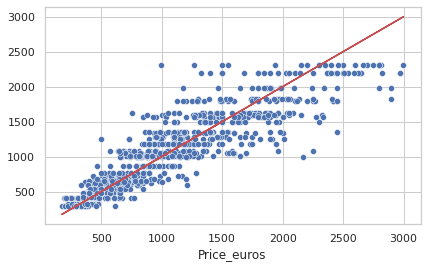

In [431]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [432]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

273.6778710794051

In [433]:
RMSLE = rmsle(y_train, y_train_pred.clip(min=0)) 
RMSLE

0.2382089389913956

In [434]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

26.9

In [435]:
y_test_pred = model.predict(X_test)

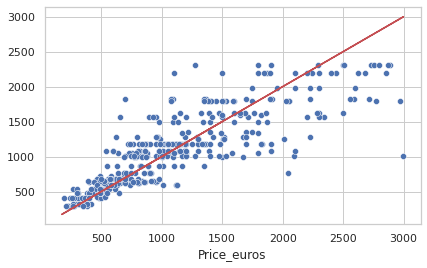

In [436]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [437]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

348.01631546221904

In [438]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.281557596193176

In [439]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

32.52

Text(0.5, 8.95999999999998, 'prediction error')

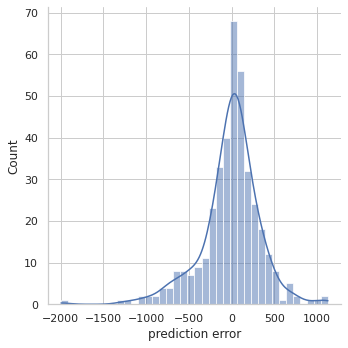

In [440]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [441]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

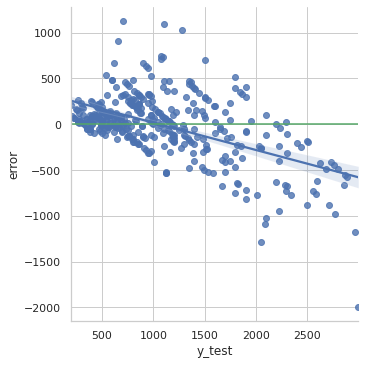

In [442]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'min samples per leaf')

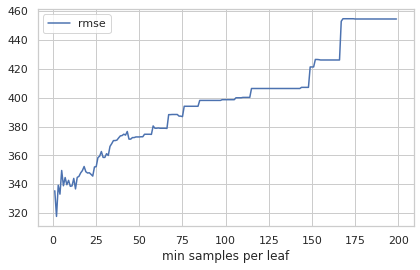

In [443]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


result.plot()
plt.xlabel('min samples per leaf')

Text(0.5, 0, 'max depth')

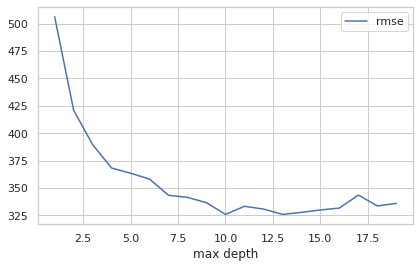

In [444]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

Text(0.5, 0, 'min_samples_split')

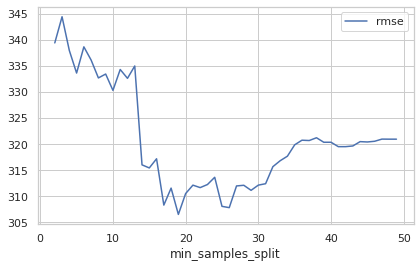

In [445]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


#display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [446]:
def visualize_tree(model, md=5):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=800) 

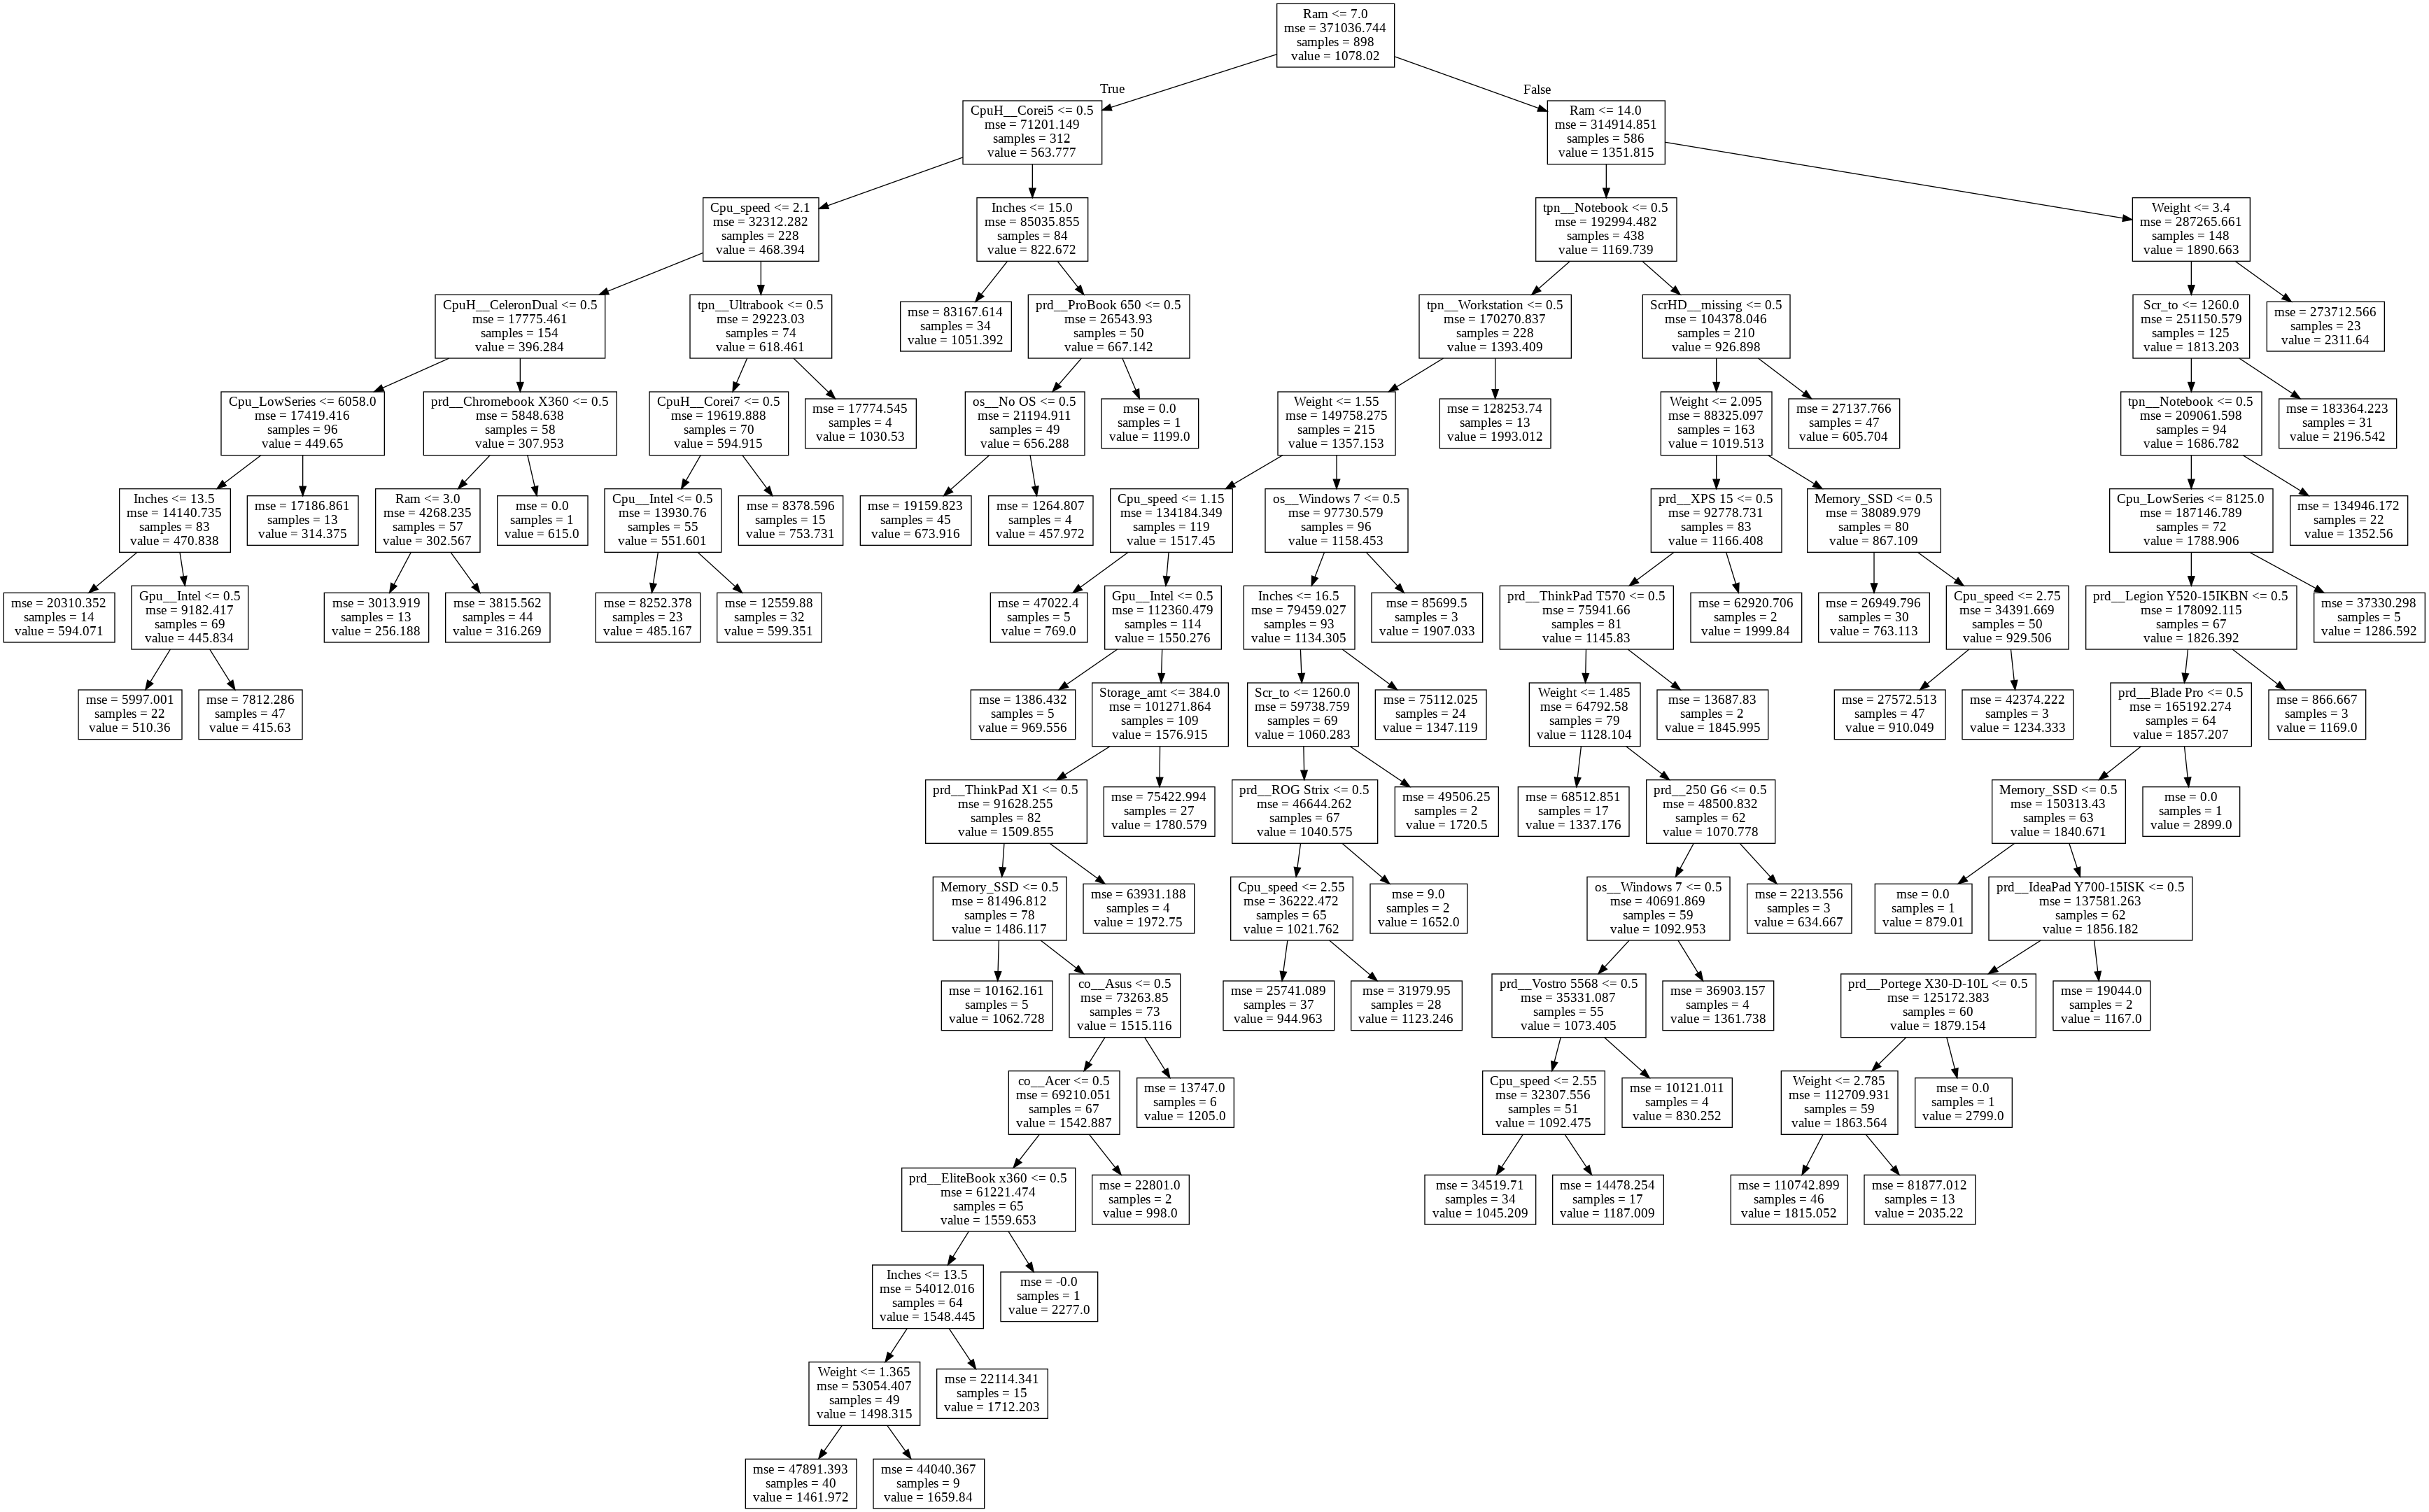

In [447]:
visualize_tree(model, md=100)

In [448]:
importances = model.feature_importances_

In [449]:
importances[::-1].sort() 

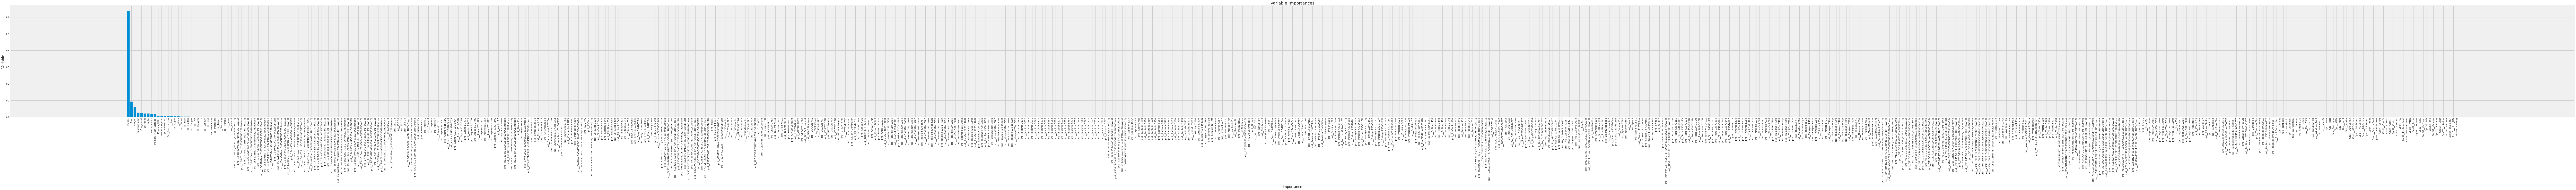

In [450]:
plt.figure(figsize=(200,10))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

In [451]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=13, min_samples_leaf=3,min_samples_split=20).fit(X_train, y_train)

In [452]:
y_train_pred = model.predict(X_train)

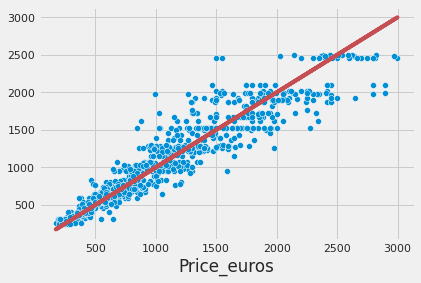

In [453]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
#sns.set(font_scale=1.2)

In [454]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

207.40190875640116

In [455]:
RMSLE = rmsle(y_train, y_train_pred.clip(min=0)) 
RMSLE

0.17065740543477992

In [456]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

18.61

In [457]:
y_test_pred = model.predict(X_test)

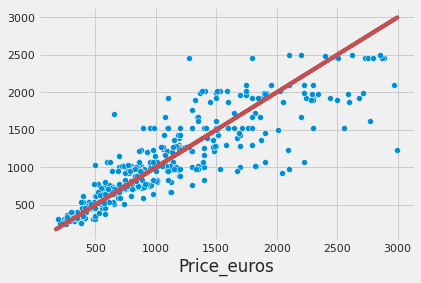

In [458]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [459]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

316.66096909732437

In [460]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.2449680084378094

In [461]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

27.76

Text(0.5, 11.120000000000005, 'prediction error')

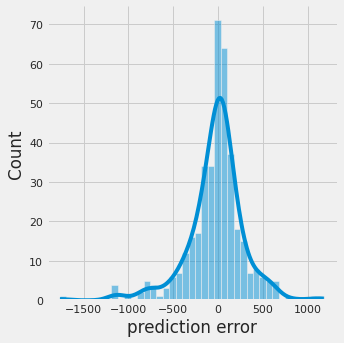

In [462]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [463]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

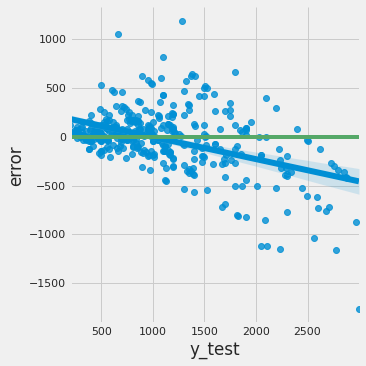

In [464]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

In [465]:
importances[::-1].sort() 

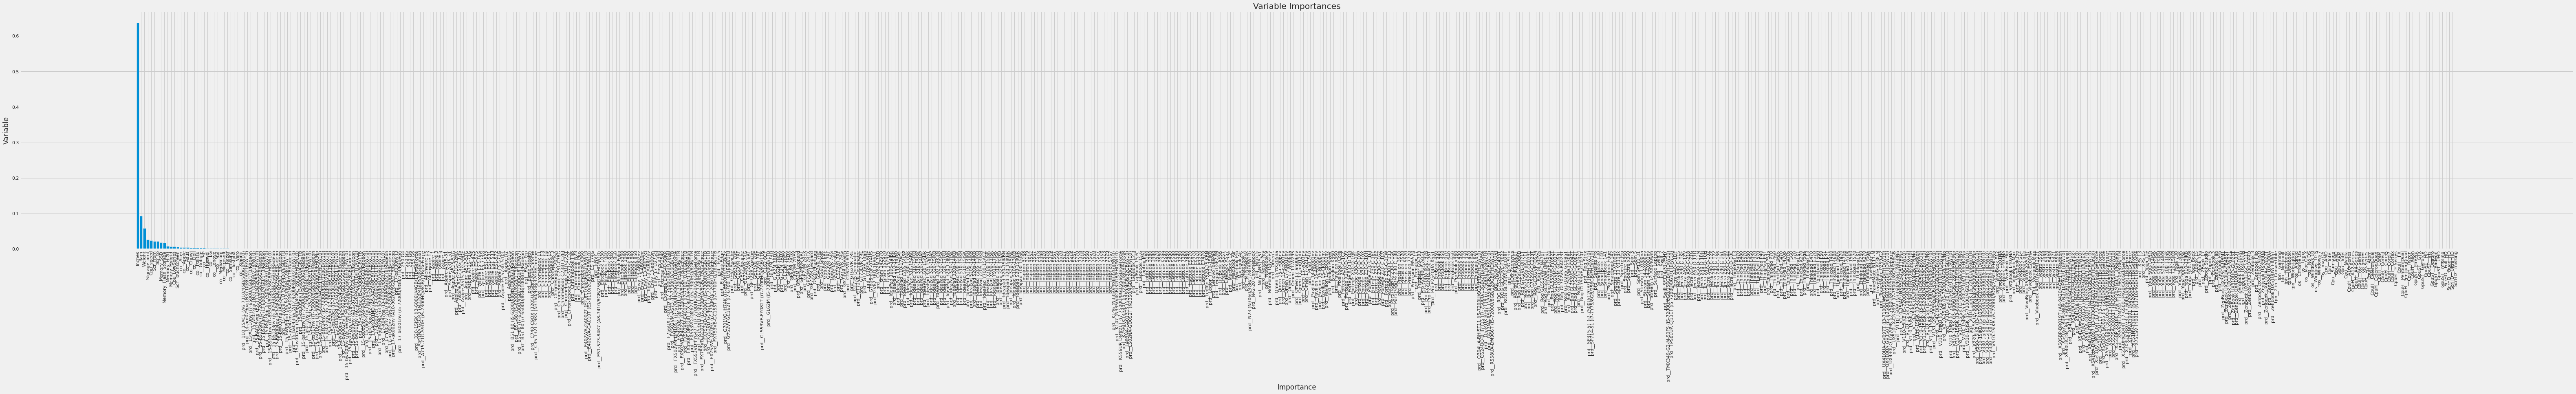

In [466]:
plt.figure(figsize=(100,10))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

# Random Forest Model

In [467]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [468]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [469]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [470]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 184.83 degrees.


In [471]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.46 %.


In [472]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [473]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=200, max_depth = 16, bootstrap = True, max_features = 'auto', min_samples_split = 2)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [474]:
# display small_tree.png
Image(filename='small_tree.png') 

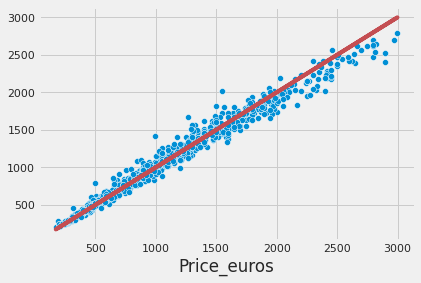

In [475]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [476]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

91.29772957220551

In [477]:
RMSLE = rmsle(y_train, y_train_pred.clip(min=0)) 
RMSLE

0.07742809815465705

In [478]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

8.05

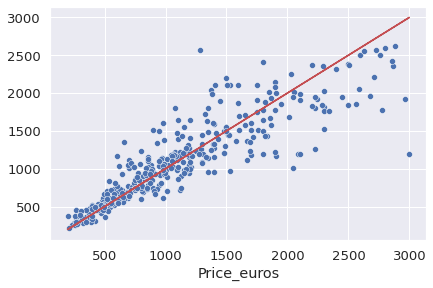

In [479]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [480]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

289.89744018258364

In [481]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.216452379562532

In [482]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

24.17

Text(0.5, 11.552000000000007, 'prediction error')

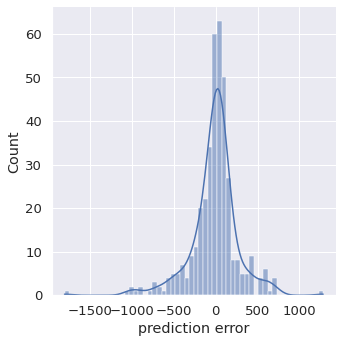

In [483]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [484]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

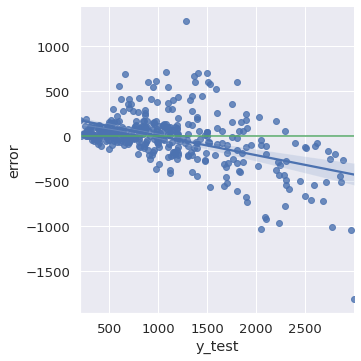

In [485]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

In [486]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
importances[::-1].sort() 

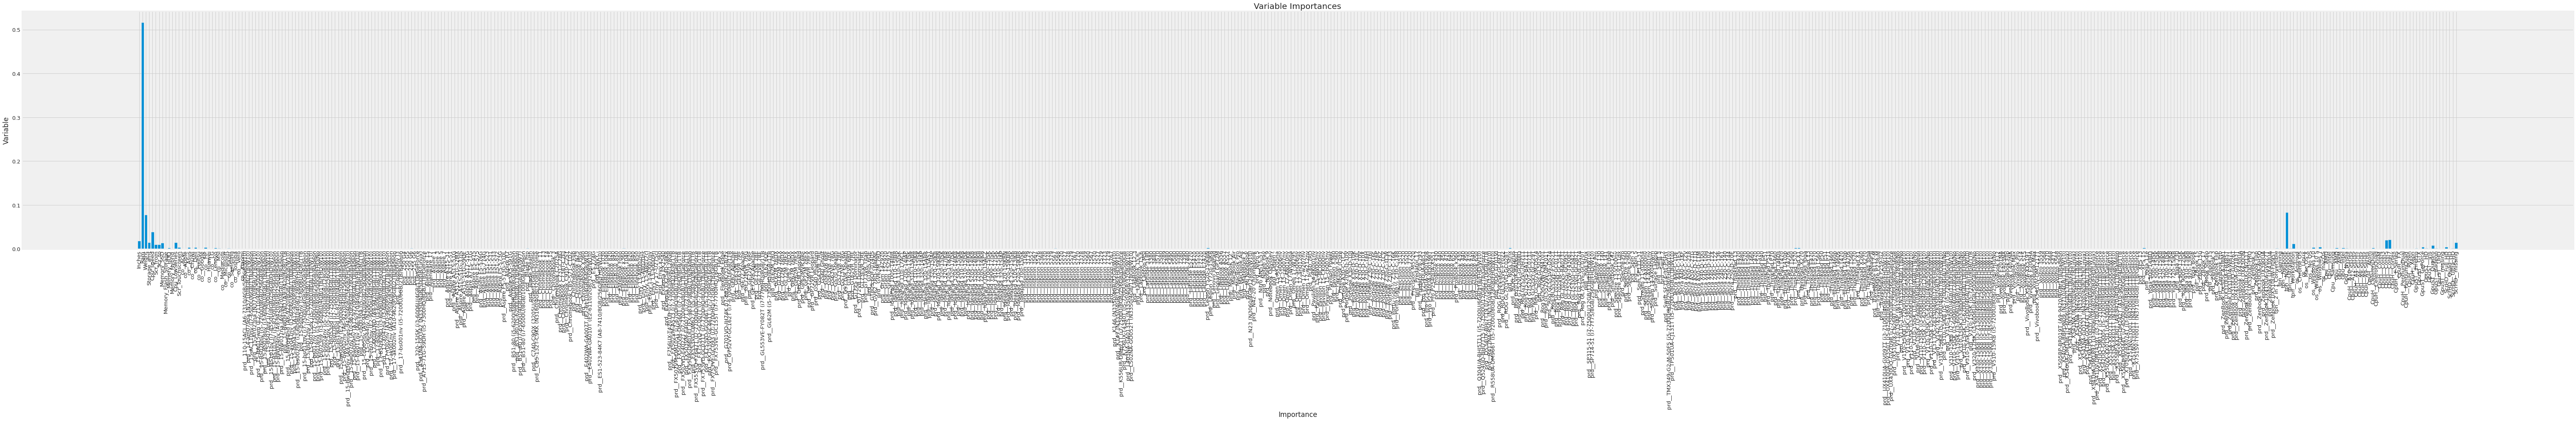

In [487]:
plt.figure(figsize=(100,10))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

In [488]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,200,500,1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth" :[4,8,10,12,16,20],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [489]:
#Grid_Search_CV_RFR(X_train,y_train)

# Linear Regression Model

In [490]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [491]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [492]:
#print(__doc__)

In [493]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [494]:
print(regr.intercept_)

-242.41816224976424


In [495]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.23708540e+01  2.53788952e+01  3.72780135e+01  1.96898769e-01
  3.51467793e+01 -6.47932913e-02  5.38655105e-01  2.11622771e+02
  2.81333729e+02  3.15803208e+01 -1.10059940e+02 -2.59484086e-02
 -3.58023033e+01 -1.14425126e+02  2.59933553e+01 -1.19671914e+02
 -3.48025310e+02 -1.67919725e+02 -2.81414390e+02  8.56994191e+01
 -1.49589867e+02  2.58810970e+01  5.66349904e+02 -1.42670207e+02
  2.10270151e+02 -2.16412872e+02  2.28386433e+02  3.82966927e+02
  1.26942987e+02  2.37067574e+02 -3.43778133e+02 -5.65030323e+00
  4.77234607e-09 -6.00778642e+02 -3.60523619e+02 -6.29248151e+02
 -3.15128600e+01 -4.53369633e+02 -3.79951629e+02 -4.62075328e+02
 -4.23930495e+02 -3.43196617e+02  7.62759100e-09  8.21440693e-11
 -1.31964298e+02 -1.93205537e+01 -4.91164944e+02 -5.99961473e+01
 -3.20147424e+02 -3.89878674e+02 -2.63515074e+02 -4.07480039e+02
 -3.57785599e+02  2.76543233e-11 -2.37121935e+02 -2.79883523e+02
 -3.67088485e+02 -1.36151357e-09 -3.90798505e-10 -2.90026492e-09
 -1.02255

In [496]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [497]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 61.707804357818986
Mean Squared Error: 8335.275425039568
Root Mean Squared Error: 91.29772957220551


In [498]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 202.7335898401596
Mean Squared Error: 91163.28652466279
Root Mean Squared Error: 301.93258605964144


In [499]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 91163.29


In [500]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.77


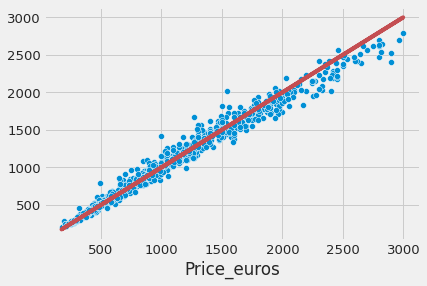

In [501]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

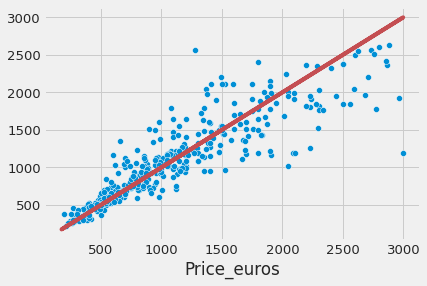

In [502]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

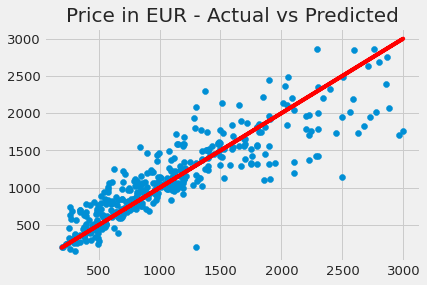

In [503]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test,  c='red')
plt.title('Price in EUR - Actual vs Predicted', size=20)
plt.show()

Text(0.5, 11.119999999999994, 'prediction error (EUR)')

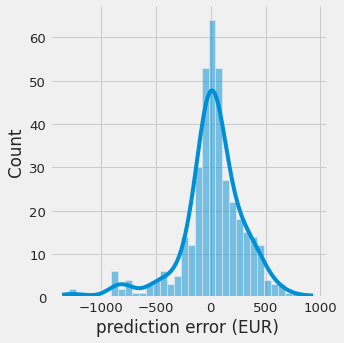

In [504]:
sns.displot(y_pred - y_test, kde=True)
plt.xlabel('prediction error (EUR)')

# K Nearest Neighbors Model

In [505]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [506]:
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [507]:
y_train_pred = model.predict(X_train)

In [508]:
pd.Series(y_train_pred).value_counts()

748.998333     6
524.228333     6
485.500000     5
568.025000     5
573.166667     5
              ..
662.075000     1
609.585000     1
1345.608333    1
1393.386667    1
1107.333333    1
Length: 598, dtype: int64

In [509]:
y_test_pred = model.predict(X_test)

In [510]:
pd.Series(y_test_pred).value_counts()

457.335000     4
527.480000     4
805.943333     3
999.165000     3
1582.333333    3
              ..
919.163333     1
844.266667     1
942.473333     1
789.333333     1
910.500000     1
Length: 305, dtype: int64

In [511]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

261.90887723341257

In [512]:
RMSLE = rmsle(y_train, y_train_pred.clip(min=0)) 
RMSLE

0.2228395195498268

In [513]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

24.96

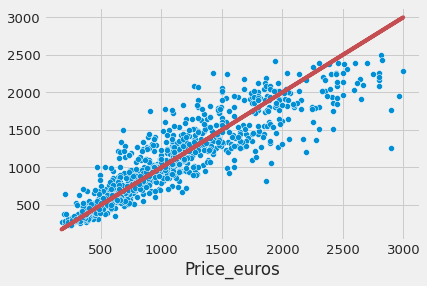

In [514]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [515]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

269.108350534548

In [516]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.21160502726924263

In [517]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

23.57

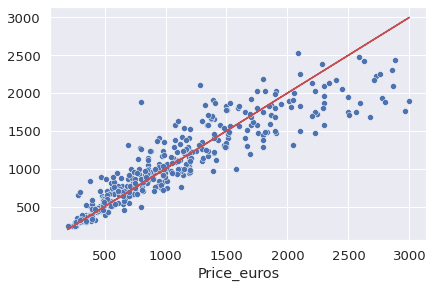

In [518]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')
sns.set(font_scale=1.2)

Text(0.5, 11.552000000000007, 'prediction error')

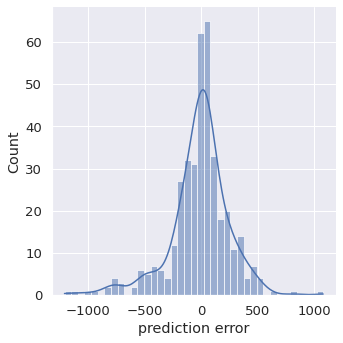

In [519]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [520]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

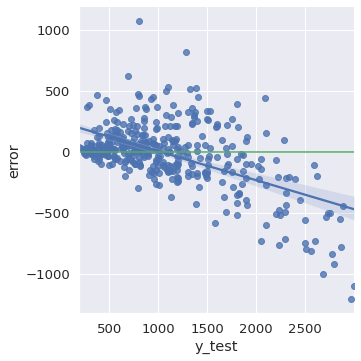

In [521]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

In [522]:
#features=X_train.columns
#importances = model.feature_importances_
#indices = np.argsort(importances)
#sns.set(font_scale=1)
#plt.figure(figsize=(10,10))
#plt.figure(1)
#plt.title('Feature Importances Price')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), features[indices])
#plt.xlabel('Relative Importance')

# **Building Categorical Dataset**

In [523]:
df_origin.head(2)

laptop_ID Company      Product  ...  OpSys  Weight Price_euros
0          1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1          2   Apple  Macbook Air  ...  macOS  1.34kg      898.94

[2 rows x 13 columns]

In [524]:
def GroupPrice(GroupValue,dfOrg):
  df_origin=dfOrg.groupby(GroupValue).agg({'Price_euros':[('avgPrice','mean'),('stdPrice',np.std)],'laptop_ID':[('countLaptop','count')]}).reset_index()
  df_origin.columns=df_origin.columns.droplevel(0)
  df_origin.columns.values[0]=GroupValue
  df_origin.sort_values('countLaptop',ascending=False,inplace=True)
  valueByPrice=df_origin.sort_values('avgPrice',ascending=False)[GroupValue].tolist()
  print(valueByPrice)
  dict_map = dict(zip(valueByPrice, range(len(valueByPrice))))
  dfOrg.loc[:, GroupValue+'Num'] = dfOrg[GroupValue].map(dict_map)
  return dfOrg

In [525]:
df_origin=GroupPrice('Company',df_origin)
#display(df_origin[['Company','CompanyNum']].head(10))

['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei', 'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP', 'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero']


In [526]:
types=GroupPrice('TypeName',df_origin)
#display(types[['TypeName','TypeNameNum']].head(10))

['Workstation', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Notebook', 'Netbook']


In [527]:
df_origin['Scr_HD']=np.where(df_origin.ScreenResolution.str.find("Full HD")>-1,'Full_HD',
                    np.where(df_origin.ScreenResolution.str.find("Quad HD")>-1,'Quad_HD',
                    np.where(df_origin.ScreenResolution.str.find("Ultra HD")>-1,'Ultra_HD',
                             'missing')))
df_origin=GroupPrice('Scr_HD',df_origin)
#display(df_origin[['Scr_HD','Scr_HDNum']].head(10))

['Ultra_HD', 'Quad_HD', 'Full_HD', 'missing']


In [528]:
df_origin['Cpu_HighSeries']=np.where((df_origin.Cpu.str.split(" ",1).str[0]=="AMD") | (df_origin.Cpu.str.split(" ",1).str[0]=="Samsung"),df_origin.Cpu.str.split(" ",1).str[1].str.split(" ",1).str[0],
          np.where((df_origin.Cpu.str.split(" ",1).str[0]=="Intel") & (df_origin.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0].isin(['Xeon','Atom'])),df_origin.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0],
          np.where(df_origin.Cpu.str.split(" ",1).str[0]=="Intel",df_origin.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0]+df_origin.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[1],     
          "missing")))
df_origin=GroupPrice('Cpu_HighSeries',df_origin)
#display(df_origin[['Cpu_HighSeries','Cpu_HighSeriesNum']].head(10))

['Xeon', 'Ryzen', 'Corei7', 'CoreM', 'Corei5', 'FX', 'Cortex', 'A12-Series', 'A10-Series', 'PentiumDual', 'Corei3', 'A9-Series', 'A8-Series', 'PentiumQuad', 'A6-Series', 'CeleronQuad', 'A4-Series', 'Atom', 'CeleronDual', 'E-Series']


In [529]:
df_origin['Gpu_brand'] = df_origin.Gpu.str.split().str[0]
df_origin=GroupPrice('Gpu_brand',df_origin)
#display(df_origin[['Gpu_brand','Gpu_brandNum']].head(10))

['Nvidia', 'Intel', 'AMD', 'ARM']


In [530]:
df_origin['Gpu_SubType']=np.where(df_origin.Gpu.str.split(" ",2).str[1].isin(['Graphics','R17M-M1-70','Mali','R4']),'missing',df_origin.Gpu.str.split(" ",2).str[1])
df_origin=GroupPrice('Gpu_SubType',df_origin)
#display(df_origin[['Gpu_SubType','Gpu_SubTypeNum']].head(10))

['GTX', 'Quadro', 'Iris', 'FirePro', 'GeForce', 'UHD', 'HD', 'Radeon', 'missing']


In [531]:
df_origin=GroupPrice('OpSys',df_origin)
#display(df_origin[['OpSys','OpSysNum']].head(10))

['macOS', 'Windows 7', 'Windows 10 S', 'Mac OS X', 'Windows 10', 'Linux', 'No OS', 'Chrome OS', 'Android']


In [532]:
df_origin['Storage_amt'] = df_origin.Memory.str.split().str[0]
storage_map = {'1.0TB':'1000', '1TB':'1000', '2TB':'2000', '508':'500'}
df_origin.Storage_amt.replace(storage_map , inplace=True)
df_origin.Storage_amt = df_origin.Storage_amt.str.replace('GB','').astype(int)

In [533]:
df_origin['Cpu_speed'] = df_origin.Cpu.str.split().str[-1]
df_origin.Cpu_speed = df_origin.Cpu_speed.str.split('GHz').str[0].astype(float)

In [534]:
test1=df_origin.Cpu.str.split().str[-2].str.split("-").str[-1]
test2=test1.apply(lambda x:re.findall(r'\d+|$',x)[0])
test2.replace([""],["0"],inplace=True)
test2=test2.astype(int)
df_origin['Cpu_LowSeries']=np.where(test2<10,0,test2)


In [535]:
df_origin['Scr_to'] = df_origin.ScreenResolution.str.split('x').str[-1]
df_origin['Scr_to'].astype(int)
df_origin['Scr_from'] = df_origin.ScreenResolution.str.split('x').str[0]
df_origin['Scr_from'] = df_origin.Scr_from.str.split().str[-1]
df_origin['Scr_from'].astype(int)
df_origin['Scr_Touchscreen']=np.where(df_origin.ScreenResolution.str.find("Touchscreen")>-1,1,0)

In [536]:
df_origin['Memory_SSD']= np.where(df_origin.Memory.str.find("SSD")==-1,0,1)
df_origin['Memory_Flash_Storage']= np.where(df_origin.Memory.str.find("Flash Storage")==-1,0,1)
df_origin['Memory_HDD']= np.where(df_origin.Memory.str.find("HDD")==-1,0,1)
df_origin['Memory_Hybrid']= np.where(df_origin.Memory.str.find("Hybrid")==-1,0,1)

In [537]:
df_origin.head(2)

laptop_ID Company  ... Memory_HDD Memory_Hybrid
0          1   Apple  ...          0             0
1          2   Apple  ...          0             0

[2 rows x 34 columns]

In [538]:
df_model_cat=df_origin[['Inches', 'Ram', 'Weight',  'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries',
             'Scr_Touchscreen','CompanyNum','TypeNameNum','Scr_HDNum','Cpu_HighSeriesNum','Gpu_brandNum','Gpu_SubTypeNum','OpSysNum','Price_euros']].copy()

In [539]:
df_model_cat.head(2)

Inches  Ram  Weight  ...  Gpu_SubTypeNum  OpSysNum Price_euros
0    13.3  8GB  1.37kg  ...               2         0     1339.69
1    13.3  8GB  1.34kg  ...               6         0      898.94

[2 rows x 21 columns]

In [540]:
df_model_cat.shape

(1303, 21)

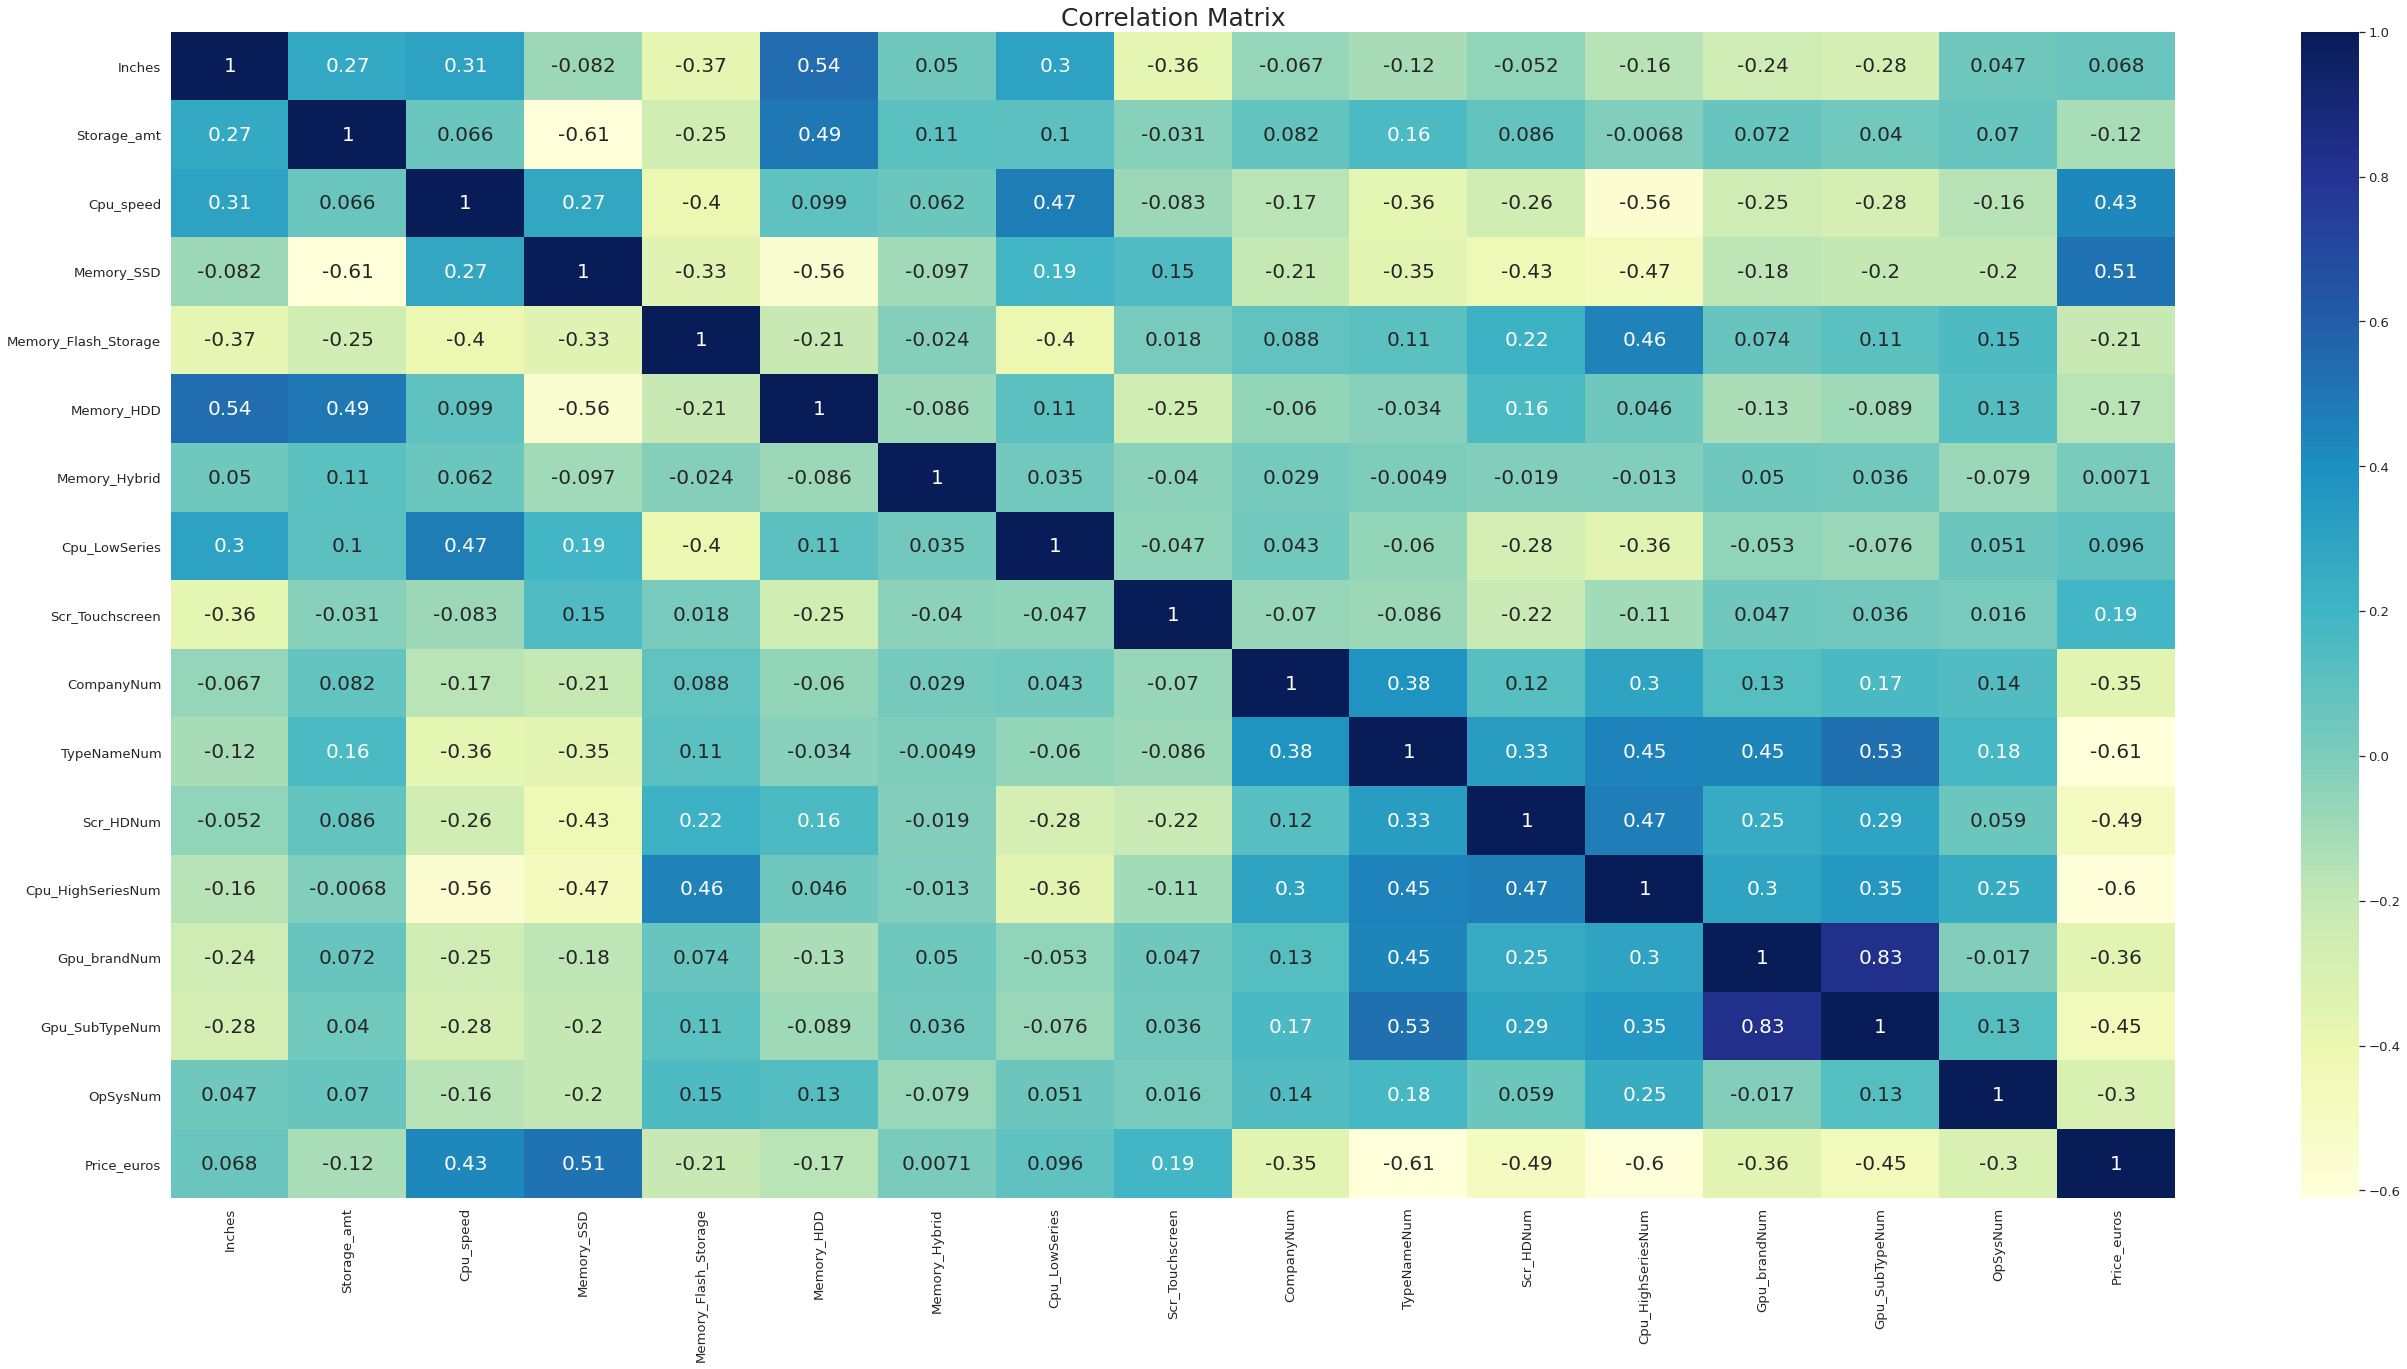

In [541]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(40,20))        
# Imbalanced DataFrame Correlation
corr = df_model_cat.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20},annot=True, ax=ax)
sns.set(font_scale=2)
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()